In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from the specified path
file_path = '/content/drive/My Drive/Course Fall 24/Intro to ML/Assignment 3/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


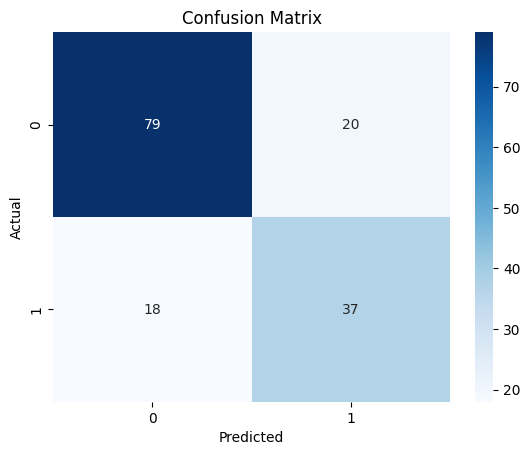

{'Accuracy': 0.7532467532467533,
 'Precision': 0.6491228070175439,
 'Recall': 0.6727272727272727,
 'F1 Score': 0.6607142857142857}

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Split the data into features (X) and target label (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Step 2: Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply scaling and standardization on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the logistic regression model with tracking of accuracy
logistic_regression_model = LogisticRegression(max_iter=500, verbose=1)

# Step 5: Fit the model and plot loss/accuracy over iterations (logistic regression does not expose loss directly, we will monitor accuracy)
history = logistic_regression_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = logistic_regression_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

metrics
